In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_breast_cancer

from tabulate import tabulate
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import skew, kurtosis, normaltest, shapiro

# modellerin basarisini degerlendirmek icin
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# models
import catboost as cb
import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVC
from keras.layers import Dense
from keras.models import Sequential
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [2]:
cancer = load_breast_cancer()

df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = pd.Series(cancer.target)

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.shape

(569, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [7]:
df.duplicated().sum()

0

In [8]:
# degiskenlik katsayisi
degiskenlik_katsayisi = df.std() / df.mean()
print(degiskenlik_katsayisi*100)

mean radius                 24.944971
mean texture                22.297118
mean perimeter              26.420829
mean area                   53.736446
mean smoothness             14.595358
mean compactness            50.615545
mean concavity              89.775251
mean concave points         79.320365
mean symmetry               15.132479
mean fractal dimension      11.243044
radius error                68.443203
texture error               45.334005
perimeter error             70.544758
area error                 112.777143
smoothness error            42.643473
compactness error           70.288413
concavity error             94.645792
concave points error        52.307676
symmetry error              40.240733
fractal dimension error     69.726956
worst radius                29.707943
worst texture               23.936613
worst perimeter             31.327767
worst area                  64.656814
worst smoothness            17.249129
worst compactness           61.878930
worst concav

<Axes: >

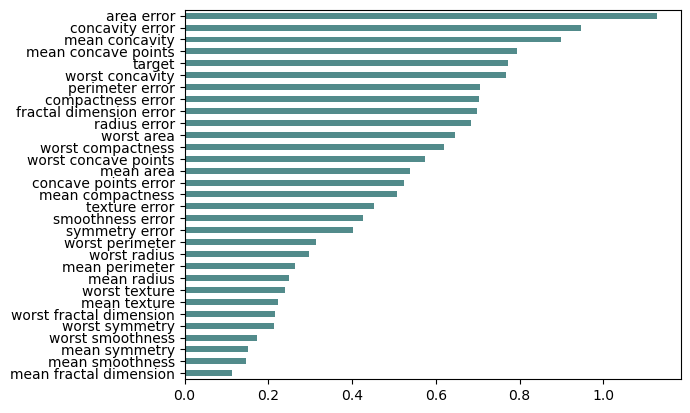

In [9]:
sirali_dk = degiskenlik_katsayisi.sort_values()
sirali_dk.plot.barh(x = 'Değişkenler', y = 'Değişkenlik Katsayısı', color = '#528b8b')

1    357
0    212
Name: target, dtype: int64

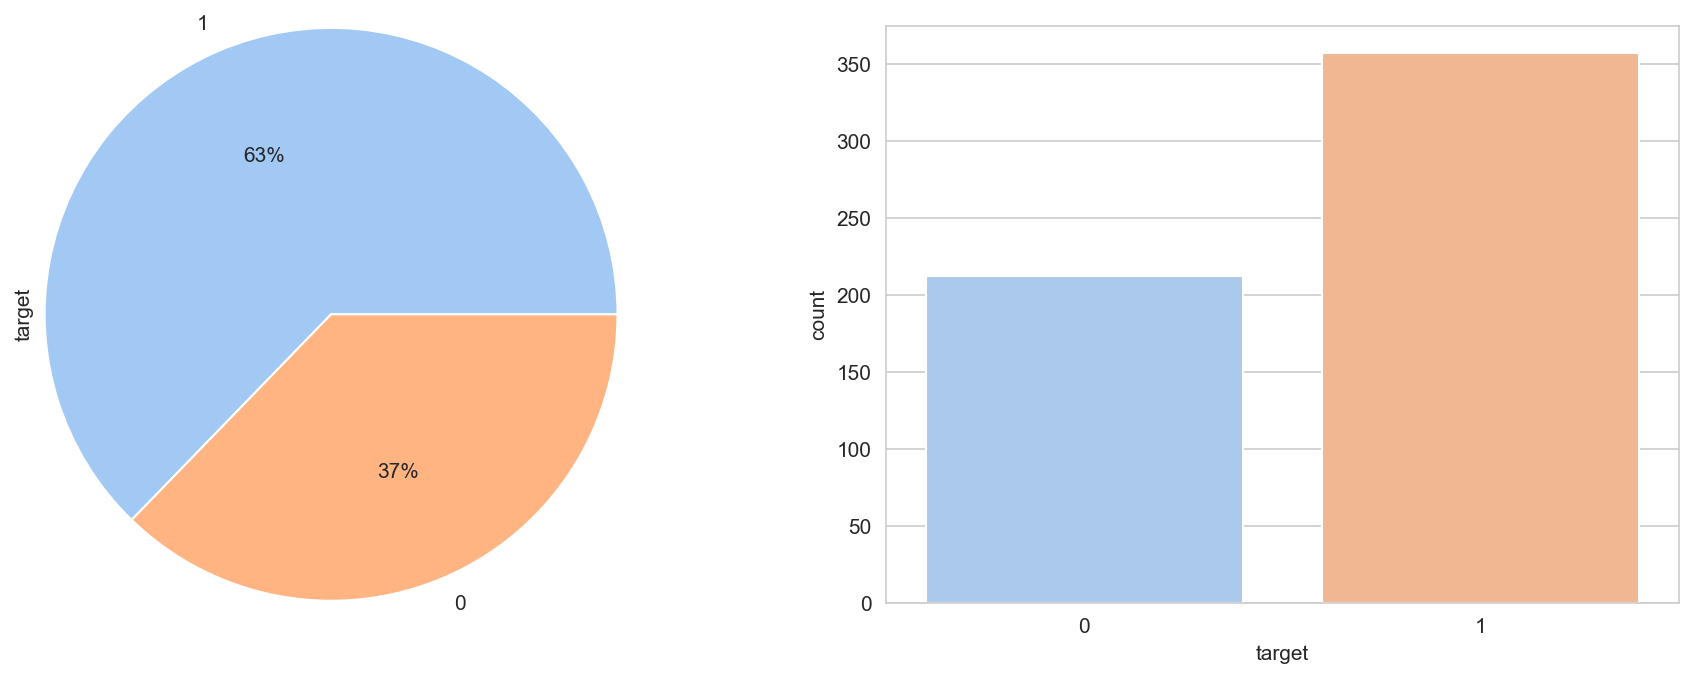

In [10]:
# hedef degiskeni
sns.set_style('whitegrid')
plt.figure(figsize=(15, 5), dpi=150)
plt.subplot(121)
df['target'].value_counts().plot(kind='pie', autopct='%2.f%%', radius=1.24, colors=sns.color_palette('pastel'))
plt.subplot(122)
sns.countplot(data=df, x='target', palette='pastel')
df['target'].value_counts()

In [11]:
# carpiklik ve basiklik
skewness = df.skew()
kurtosisness = df.kurtosis()

headers = ['Variable', 'Shapiro Test', 'Skewness C.', 'Skewness', 'Kurtosis C.', 'Kurtosis']

table_data = []
for col in df.columns:
    stat, p = normaltest(df[col])
    skewness_val = f'{skewness[col]:.4f}'
    skewness_desc = 'Yüksek çarpıklık' if skewness[col] < -1 or skewness[col] > 1 else 'Simetrik veya hafif çarpık'
    kurtosis_val = f'{kurtosisness[col]:.4f}'
    kurtosis_desc = 'Çok basık veya sivri' if kurtosisness[col] < -2 or kurtosisness[col] > 2 else 'Normal veya hafif basık'

    stat_sh, p_sh = shapiro(df[col])
    shapiro_test = 'Yes' if p_sh >= 0.05 else 'No'
    
    table_data.append([col, shapiro_test, skewness_val, skewness_desc, kurtosis_val, kurtosis_desc])

table = tabulate(table_data, headers, tablefmt='pretty')
print(table)

+-------------------------+--------------+-------------+----------------------------+-------------+-------------------------+
|        Variable         | Shapiro Test | Skewness C. |          Skewness          | Kurtosis C. |        Kurtosis         |
+-------------------------+--------------+-------------+----------------------------+-------------+-------------------------+
|       mean radius       |      No      |   0.9424    | Simetrik veya hafif çarpık |   0.8455    | Normal veya hafif basık |
|      mean texture       |      No      |   0.6504    | Simetrik veya hafif çarpık |   0.7583    | Normal veya hafif basık |
|     mean perimeter      |      No      |   0.9907    | Simetrik veya hafif çarpık |   0.9722    | Normal veya hafif basık |
|        mean area        |      No      |   1.6457    |      Yüksek çarpıklık      |   3.6523    |  Çok basık veya sivri   |
|     mean smoothness     |      No      |   0.4563    | Simetrik veya hafif çarpık |   0.8560    | Normal veya hafif 

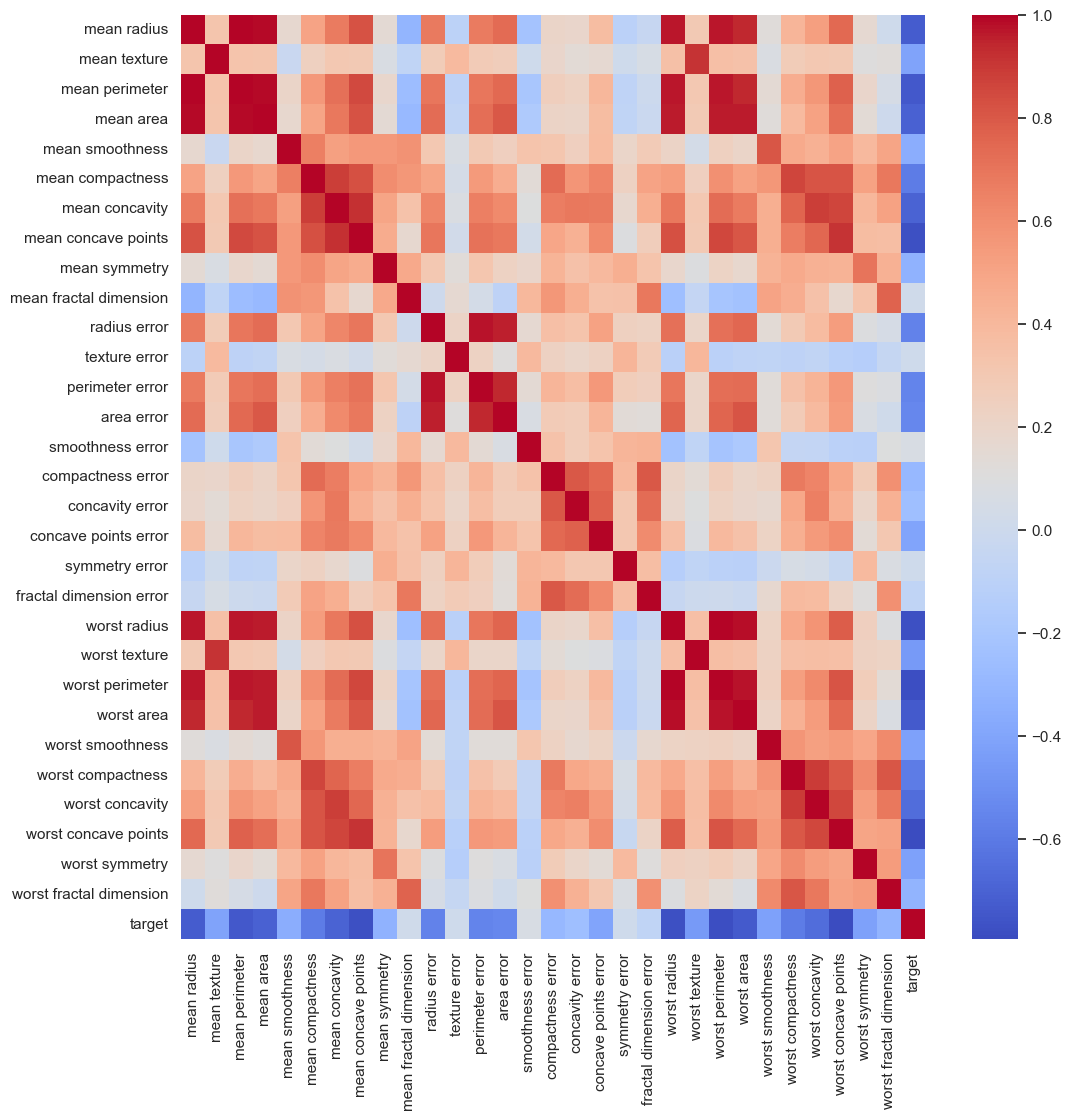

In [12]:
# korelasyon
corr = df.corr()
sns.set(rc={'figure.figsize': (12, 12)})
sns.heatmap(corr, cmap='coolwarm')
plt.show()

In [13]:
df['target'].unique()

array([0, 1])

In [14]:
# bagimli ve bagimsiz degisken
y = df['target']                    
x = df.drop(['target'], axis=1) 

In [15]:
# train-test-split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
print('X_train =', X_train.shape)
print('y_train =', y_train.shape)
print('X_test =', X_test.shape)
print('y_test =', y_test.shape)

X_train = (455, 30)
y_train = (455,)
X_test = (114, 30)
y_test = (114,)


In [17]:
# standartizasyon
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Support Vector Classifier', SVC()),
    ('Naive Bayes', GaussianNB()),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('XGBoost', xgb.XGBClassifier()),
    ('LightGBM', lgb.LGBMClassifier()),
    ('CatBoost', cb.CatBoostClassifier(verbose=0)),
    ('AdaBoost', AdaBoostClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier())
]

results = []
confusion_matrices = []
classification_reports = []

for model_name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=5)
    mean_accuracy = cv_results.mean()
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    
    results.append((model_name, mean_accuracy, accuracy))
    confusion_matrices.append((model_name, cm))
    classification_reports.append((model_name, cr))

df_results = pd.DataFrame(results, columns=['Model', 'Cross-Validation Accuracy', 'Test Accuracy'])
df_results.sort_values('Cross-Validation Accuracy', ascending=False, inplace=True)

print(df_results.to_string(index=False))

                    Model  Cross-Validation Accuracy  Test Accuracy
Support Vector Classifier                   0.975824       0.982456
      Logistic Regression                   0.973626       0.973684
                  XGBoost                   0.964835       0.956140
                 AdaBoost                   0.964835       0.973684
                 CatBoost                   0.964835       0.973684
                      KNN                   0.960440       0.947368
                 LightGBM                   0.960440       0.964912
            Random Forest                   0.956044       0.964912
        Gradient Boosting                   0.951648       0.956140
              Naive Bayes                   0.934066       0.964912
            Decision Tree                   0.920879       0.938596


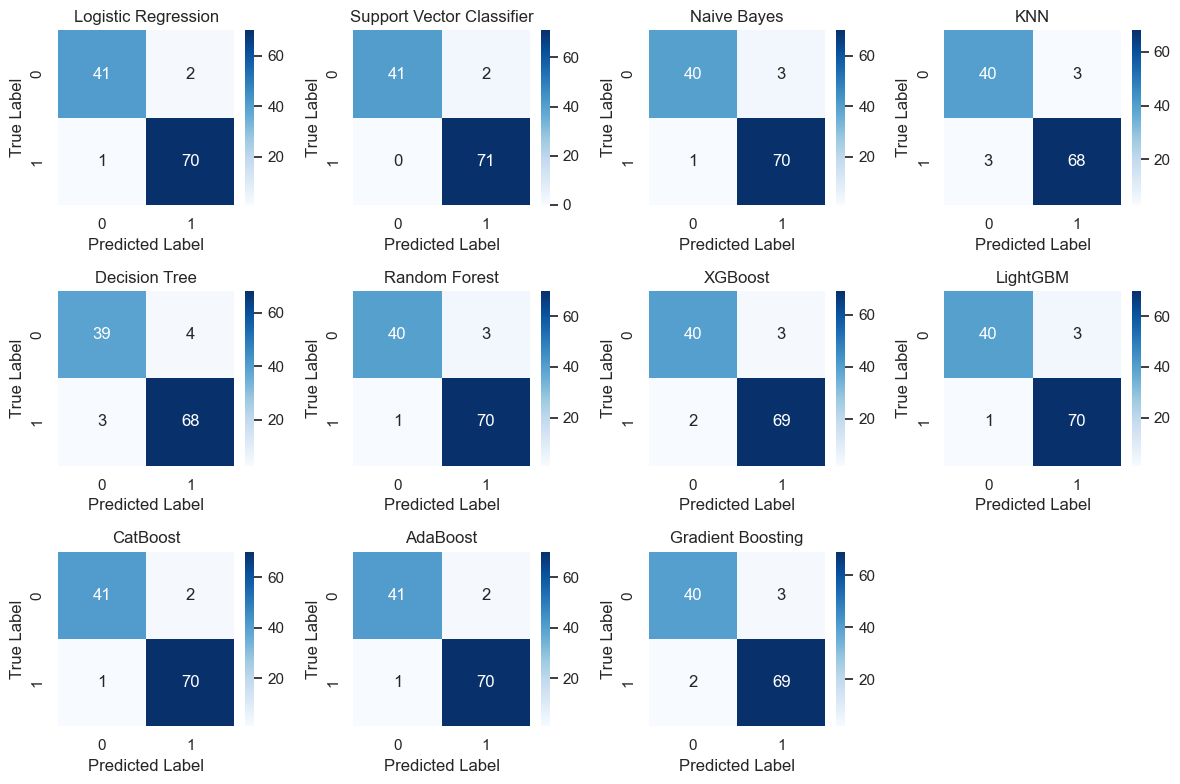

In [19]:
# confusion matrices
plt.figure(figsize=(12, 8))
for i, (model_name, cm) in enumerate(confusion_matrices, 1):
    plt.subplot(3, 4, i)
    plt.title(model_name)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [20]:
for model_name, cr in classification_reports:
    print(f'\033[1m{model_name}:\033[0m')
    print(f'\033[1mClassification Report:\033[0m')
    print(cr)
    print('-'*60)

Logistic Regression:
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

------------------------------------------------------------
Support Vector Classifier:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

------------------------------------------------------------
Naive Bayes:
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      

In [21]:
# yapay sinir agi keras
# optuna ile parametre ayarı
import optuna

def objective(trial):
    num_layers = trial.suggest_int('num_layers', 1, 3)
    num_units = trial.suggest_int('num_units', 8, 64)
    activation = trial.suggest_categorical('activation', ['relu', 'sigmoid', 'tanh'])
    optimizer = trial.suggest_categorical('optimizer', ['adam', 'sgd', 'rmsprop'])
    epochs = trial.suggest_int('epochs', 50, 200)

    model = Sequential()
    model.add(Dense(num_units, input_dim=30, activation=activation))
    for i in range(num_layers - 1):
        model.add(Dense(num_units, activation=activation))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=0)

    loss, accuracy = model.evaluate(X_test, y_test)
    return accuracy

In [22]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2023-07-22 19:58:42,277] A new study created in memory with name: no-name-3f02e003-8af8-43ea-ace4-ffba734ac7b1


4/4 [==============================] - 0s 5ms/step - loss: 0.0747 - accuracy: 0.9825


[I 2023-07-22 19:58:46,121] Trial 0 finished with value: 0.9824561476707458 and parameters: {'num_layers': 1, 'num_units': 55, 'activation': 'tanh', 'optimizer': 'adam', 'epochs': 112}. Best is trial 0 with value: 0.9824561476707458.


4/4 [==============================] - 0s 0s/step - loss: 0.0766 - accuracy: 0.9825


[I 2023-07-22 19:58:49,801] Trial 1 finished with value: 0.9824561476707458 and parameters: {'num_layers': 3, 'num_units': 23, 'activation': 'sigmoid', 'optimizer': 'adam', 'epochs': 110}. Best is trial 0 with value: 0.9824561476707458.


4/4 [==============================] - 0s 0s/step - loss: 0.3618 - accuracy: 0.9561


[I 2023-07-22 19:58:53,568] Trial 2 finished with value: 0.9561403393745422 and parameters: {'num_layers': 2, 'num_units': 11, 'activation': 'sigmoid', 'optimizer': 'sgd', 'epochs': 129}. Best is trial 0 with value: 0.9824561476707458.


4/4 [==============================] - 0s 3ms/step - loss: 0.0899 - accuracy: 0.9737


[I 2023-07-22 19:58:56,659] Trial 3 finished with value: 0.9736841917037964 and parameters: {'num_layers': 1, 'num_units': 60, 'activation': 'relu', 'optimizer': 'rmsprop', 'epochs': 80}. Best is trial 0 with value: 0.9824561476707458.


4/4 [==============================] - 0s 2ms/step - loss: 0.0630 - accuracy: 0.9825


[I 2023-07-22 19:58:59,460] Trial 4 finished with value: 0.9824561476707458 and parameters: {'num_layers': 1, 'num_units': 18, 'activation': 'relu', 'optimizer': 'adam', 'epochs': 84}. Best is trial 0 with value: 0.9824561476707458.


4/4 [==============================] - 0s 0s/step - loss: 0.0674 - accuracy: 0.9825


[I 2023-07-22 19:59:04,075] Trial 5 finished with value: 0.9824561476707458 and parameters: {'num_layers': 1, 'num_units': 13, 'activation': 'tanh', 'optimizer': 'adam', 'epochs': 164}. Best is trial 0 with value: 0.9824561476707458.


4/4 [==============================] - 0s 4ms/step - loss: 0.0743 - accuracy: 0.9649


[I 2023-07-22 19:59:07,720] Trial 6 finished with value: 0.9649122953414917 and parameters: {'num_layers': 3, 'num_units': 23, 'activation': 'relu', 'optimizer': 'sgd', 'epochs': 120}. Best is trial 0 with value: 0.9824561476707458.


4/4 [==============================] - 0s 3ms/step - loss: 0.0689 - accuracy: 0.9737


[I 2023-07-22 19:59:11,869] Trial 7 finished with value: 0.9736841917037964 and parameters: {'num_layers': 1, 'num_units': 41, 'activation': 'relu', 'optimizer': 'sgd', 'epochs': 151}. Best is trial 0 with value: 0.9824561476707458.


4/4 [==============================] - 0s 3ms/step - loss: 0.0871 - accuracy: 0.9649


[I 2023-07-22 19:59:15,750] Trial 8 finished with value: 0.9649122953414917 and parameters: {'num_layers': 2, 'num_units': 9, 'activation': 'relu', 'optimizer': 'sgd', 'epochs': 130}. Best is trial 0 with value: 0.9824561476707458.


4/4 [==============================] - 0s 3ms/step - loss: 0.0549 - accuracy: 0.9912


[I 2023-07-22 19:59:18,247] Trial 9 finished with value: 0.9912280440330505 and parameters: {'num_layers': 2, 'num_units': 23, 'activation': 'sigmoid', 'optimizer': 'adam', 'epochs': 61}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 3ms/step - loss: 0.0530 - accuracy: 0.9825


[I 2023-07-22 19:59:20,719] Trial 10 finished with value: 0.9824561476707458 and parameters: {'num_layers': 2, 'num_units': 35, 'activation': 'sigmoid', 'optimizer': 'rmsprop', 'epochs': 53}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 3ms/step - loss: 0.1765 - accuracy: 0.9649


[I 2023-07-22 19:59:26,758] Trial 11 finished with value: 0.9649122953414917 and parameters: {'num_layers': 2, 'num_units': 63, 'activation': 'tanh', 'optimizer': 'adam', 'epochs': 199}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 0s/step - loss: 0.1065 - accuracy: 0.9561


[I 2023-07-22 19:59:29,096] Trial 12 finished with value: 0.9561403393745422 and parameters: {'num_layers': 3, 'num_units': 49, 'activation': 'tanh', 'optimizer': 'adam', 'epochs': 50}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 3ms/step - loss: 0.0627 - accuracy: 0.9825


[I 2023-07-22 19:59:32,224] Trial 13 finished with value: 0.9824561476707458 and parameters: {'num_layers': 1, 'num_units': 33, 'activation': 'tanh', 'optimizer': 'adam', 'epochs': 87}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 3ms/step - loss: 0.0558 - accuracy: 0.9825


[I 2023-07-22 19:59:35,049] Trial 14 finished with value: 0.9824561476707458 and parameters: {'num_layers': 2, 'num_units': 53, 'activation': 'sigmoid', 'optimizer': 'adam', 'epochs': 68}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 3ms/step - loss: 0.0655 - accuracy: 0.9825


[I 2023-07-22 19:59:38,233] Trial 15 finished with value: 0.9824561476707458 and parameters: {'num_layers': 1, 'num_units': 44, 'activation': 'tanh', 'optimizer': 'adam', 'epochs': 104}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 5ms/step - loss: 0.0834 - accuracy: 0.9825


[I 2023-07-22 19:59:43,035] Trial 16 finished with value: 0.9824561476707458 and parameters: {'num_layers': 3, 'num_units': 28, 'activation': 'sigmoid', 'optimizer': 'rmsprop', 'epochs': 153}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 5ms/step - loss: 0.1397 - accuracy: 0.9737


[I 2023-07-22 19:59:48,467] Trial 17 finished with value: 0.9736841917037964 and parameters: {'num_layers': 2, 'num_units': 53, 'activation': 'tanh', 'optimizer': 'adam', 'epochs': 194}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 3ms/step - loss: 0.0625 - accuracy: 0.9825


[I 2023-07-22 19:59:52,091] Trial 18 finished with value: 0.9824561476707458 and parameters: {'num_layers': 2, 'num_units': 29, 'activation': 'sigmoid', 'optimizer': 'adam', 'epochs': 100}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 0s/step - loss: 0.0604 - accuracy: 0.9825


[I 2023-07-22 19:59:54,583] Trial 19 finished with value: 0.9824561476707458 and parameters: {'num_layers': 1, 'num_units': 43, 'activation': 'tanh', 'optimizer': 'rmsprop', 'epochs': 67}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 75us/step - loss: 0.0712 - accuracy: 0.9825


[I 2023-07-22 19:59:59,687] Trial 20 finished with value: 0.9824561476707458 and parameters: {'num_layers': 2, 'num_units': 58, 'activation': 'sigmoid', 'optimizer': 'adam', 'epochs': 175}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 3ms/step - loss: 0.0774 - accuracy: 0.9825


[I 2023-07-22 20:00:03,274] Trial 21 finished with value: 0.9824561476707458 and parameters: {'num_layers': 3, 'num_units': 19, 'activation': 'sigmoid', 'optimizer': 'adam', 'epochs': 107}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 3ms/step - loss: 0.0988 - accuracy: 0.9825


[I 2023-07-22 20:00:07,459] Trial 22 finished with value: 0.9824561476707458 and parameters: {'num_layers': 3, 'num_units': 25, 'activation': 'sigmoid', 'optimizer': 'adam', 'epochs': 120}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 3ms/step - loss: 0.0681 - accuracy: 0.9825


[I 2023-07-22 20:00:12,041] Trial 23 finished with value: 0.9824561476707458 and parameters: {'num_layers': 3, 'num_units': 19, 'activation': 'sigmoid', 'optimizer': 'adam', 'epochs': 141}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 4ms/step - loss: 0.0718 - accuracy: 0.9825


[I 2023-07-22 20:00:15,394] Trial 24 finished with value: 0.9824561476707458 and parameters: {'num_layers': 3, 'num_units': 38, 'activation': 'sigmoid', 'optimizer': 'adam', 'epochs': 93}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 3ms/step - loss: 0.0610 - accuracy: 0.9825


[I 2023-07-22 20:00:19,052] Trial 25 finished with value: 0.9824561476707458 and parameters: {'num_layers': 2, 'num_units': 31, 'activation': 'sigmoid', 'optimizer': 'adam', 'epochs': 112}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 3ms/step - loss: 0.0561 - accuracy: 0.9825


[I 2023-07-22 20:00:21,599] Trial 26 finished with value: 0.9824561476707458 and parameters: {'num_layers': 1, 'num_units': 24, 'activation': 'tanh', 'optimizer': 'adam', 'epochs': 74}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 4ms/step - loss: 0.0798 - accuracy: 0.9825


[I 2023-07-22 20:00:25,915] Trial 27 finished with value: 0.9824561476707458 and parameters: {'num_layers': 3, 'num_units': 17, 'activation': 'sigmoid', 'optimizer': 'adam', 'epochs': 136}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 3ms/step - loss: 0.0550 - accuracy: 0.9825


[I 2023-07-22 20:00:29,333] Trial 28 finished with value: 0.9824561476707458 and parameters: {'num_layers': 2, 'num_units': 48, 'activation': 'sigmoid', 'optimizer': 'rmsprop', 'epochs': 94}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 3ms/step - loss: 0.0537 - accuracy: 0.9825


[I 2023-07-22 20:00:31,738] Trial 29 finished with value: 0.9824561476707458 and parameters: {'num_layers': 2, 'num_units': 37, 'activation': 'tanh', 'optimizer': 'sgd', 'epochs': 64}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 3ms/step - loss: 0.6391 - accuracy: 0.6228


[I 2023-07-22 20:00:35,314] Trial 30 finished with value: 0.6228070259094238 and parameters: {'num_layers': 3, 'num_units': 12, 'activation': 'sigmoid', 'optimizer': 'sgd', 'epochs': 116}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 0s/step - loss: 0.0644 - accuracy: 0.9737


[I 2023-07-22 20:00:37,973] Trial 31 finished with value: 0.9736841917037964 and parameters: {'num_layers': 1, 'num_units': 17, 'activation': 'relu', 'optimizer': 'adam', 'epochs': 81}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 3ms/step - loss: 0.0553 - accuracy: 0.9912


[I 2023-07-22 20:00:40,202] Trial 32 finished with value: 0.9912280440330505 and parameters: {'num_layers': 1, 'num_units': 22, 'activation': 'relu', 'optimizer': 'adam', 'epochs': 60}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 3ms/step - loss: 0.0518 - accuracy: 0.9825


[I 2023-07-22 20:00:42,488] Trial 33 finished with value: 0.9824561476707458 and parameters: {'num_layers': 1, 'num_units': 23, 'activation': 'relu', 'optimizer': 'adam', 'epochs': 62}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 0s/step - loss: 0.0603 - accuracy: 0.9825


[I 2023-07-22 20:00:45,577] Trial 34 finished with value: 0.9824561476707458 and parameters: {'num_layers': 1, 'num_units': 27, 'activation': 'relu', 'optimizer': 'adam', 'epochs': 77}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 0s/step - loss: 0.0566 - accuracy: 0.9825


[I 2023-07-22 20:00:48,454] Trial 35 finished with value: 0.9824561476707458 and parameters: {'num_layers': 1, 'num_units': 21, 'activation': 'relu', 'optimizer': 'adam', 'epochs': 89}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 0s/step - loss: 0.0658 - accuracy: 0.9737


[I 2023-07-22 20:00:50,582] Trial 36 finished with value: 0.9736841917037964 and parameters: {'num_layers': 1, 'num_units': 15, 'activation': 'relu', 'optimizer': 'adam', 'epochs': 56}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 2ms/step - loss: 0.0780 - accuracy: 0.9825


[I 2023-07-22 20:00:54,286] Trial 37 finished with value: 0.9824561476707458 and parameters: {'num_layers': 1, 'num_units': 31, 'activation': 'relu', 'optimizer': 'rmsprop', 'epochs': 128}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 0s/step - loss: 0.0850 - accuracy: 0.9649


[I 2023-07-22 20:00:56,657] Trial 38 finished with value: 0.9649122953414917 and parameters: {'num_layers': 1, 'num_units': 9, 'activation': 'relu', 'optimizer': 'sgd', 'epochs': 74}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 3ms/step - loss: 0.0610 - accuracy: 0.9825


[I 2023-07-22 20:00:59,641] Trial 39 finished with value: 0.9824561476707458 and parameters: {'num_layers': 1, 'num_units': 14, 'activation': 'tanh', 'optimizer': 'adam', 'epochs': 96}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 3ms/step - loss: 0.0676 - accuracy: 0.9825


[I 2023-07-22 20:01:04,030] Trial 40 finished with value: 0.9824561476707458 and parameters: {'num_layers': 2, 'num_units': 21, 'activation': 'sigmoid', 'optimizer': 'adam', 'epochs': 148}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 5ms/step - loss: 0.0653 - accuracy: 0.9825


[I 2023-07-22 20:01:06,720] Trial 41 finished with value: 0.9824561476707458 and parameters: {'num_layers': 1, 'num_units': 26, 'activation': 'relu', 'optimizer': 'adam', 'epochs': 82}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 3ms/step - loss: 0.0568 - accuracy: 0.9912


[I 2023-07-22 20:01:08,857] Trial 42 finished with value: 0.9912280440330505 and parameters: {'num_layers': 1, 'num_units': 20, 'activation': 'relu', 'optimizer': 'adam', 'epochs': 58}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 3ms/step - loss: 0.0659 - accuracy: 0.9649


[I 2023-07-22 20:01:10,983] Trial 43 finished with value: 0.9649122953414917 and parameters: {'num_layers': 1, 'num_units': 22, 'activation': 'relu', 'optimizer': 'adam', 'epochs': 58}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 0s/step - loss: 0.0672 - accuracy: 0.9737


[I 2023-07-22 20:01:13,435] Trial 44 finished with value: 0.9736841917037964 and parameters: {'num_layers': 1, 'num_units': 34, 'activation': 'relu', 'optimizer': 'adam', 'epochs': 71}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 0s/step - loss: 0.0869 - accuracy: 0.9649


[I 2023-07-22 20:01:15,608] Trial 45 finished with value: 0.9649122953414917 and parameters: {'num_layers': 2, 'num_units': 30, 'activation': 'relu', 'optimizer': 'adam', 'epochs': 53}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 0s/step - loss: 0.0862 - accuracy: 0.9649


[I 2023-07-22 20:01:17,465] Trial 46 finished with value: 0.9649122953414917 and parameters: {'num_layers': 1, 'num_units': 11, 'activation': 'tanh', 'optimizer': 'sgd', 'epochs': 50}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 3ms/step - loss: 0.2169 - accuracy: 0.9561


[I 2023-07-22 20:01:22,257] Trial 47 finished with value: 0.9561403393745422 and parameters: {'num_layers': 2, 'num_units': 61, 'activation': 'relu', 'optimizer': 'adam', 'epochs': 166}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 0s/step - loss: 0.0593 - accuracy: 0.9825


[I 2023-07-22 20:01:24,559] Trial 48 finished with value: 0.9824561476707458 and parameters: {'num_layers': 1, 'num_units': 8, 'activation': 'tanh', 'optimizer': 'rmsprop', 'epochs': 62}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 2ms/step - loss: 0.0538 - accuracy: 0.9912


[I 2023-07-22 20:01:27,379] Trial 49 finished with value: 0.9912280440330505 and parameters: {'num_layers': 1, 'num_units': 39, 'activation': 'sigmoid', 'optimizer': 'adam', 'epochs': 86}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 0s/step - loss: 0.0524 - accuracy: 0.9912


[I 2023-07-22 20:01:30,657] Trial 50 finished with value: 0.9912280440330505 and parameters: {'num_layers': 1, 'num_units': 53, 'activation': 'sigmoid', 'optimizer': 'adam', 'epochs': 87}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 3ms/step - loss: 0.0541 - accuracy: 0.9912


[I 2023-07-22 20:01:33,436] Trial 51 finished with value: 0.9912280440330505 and parameters: {'num_layers': 1, 'num_units': 53, 'activation': 'sigmoid', 'optimizer': 'adam', 'epochs': 83}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 3ms/step - loss: 0.0532 - accuracy: 0.9825


[I 2023-07-22 20:01:36,242] Trial 52 finished with value: 0.9824561476707458 and parameters: {'num_layers': 1, 'num_units': 49, 'activation': 'sigmoid', 'optimizer': 'adam', 'epochs': 85}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 3ms/step - loss: 0.0545 - accuracy: 0.9912


[I 2023-07-22 20:01:38,655] Trial 53 finished with value: 0.9912280440330505 and parameters: {'num_layers': 1, 'num_units': 54, 'activation': 'sigmoid', 'optimizer': 'adam', 'epochs': 69}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 3ms/step - loss: 0.0580 - accuracy: 0.9912


[I 2023-07-22 20:01:40,910] Trial 54 finished with value: 0.9912280440330505 and parameters: {'num_layers': 1, 'num_units': 47, 'activation': 'sigmoid', 'optimizer': 'adam', 'epochs': 61}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 0s/step - loss: 0.0528 - accuracy: 0.9912


[I 2023-07-22 20:01:43,552] Trial 55 finished with value: 0.9912280440330505 and parameters: {'num_layers': 1, 'num_units': 57, 'activation': 'sigmoid', 'optimizer': 'adam', 'epochs': 77}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 5ms/step - loss: 0.0534 - accuracy: 0.9825


[I 2023-07-22 20:01:46,699] Trial 56 finished with value: 0.9824561476707458 and parameters: {'num_layers': 1, 'num_units': 51, 'activation': 'sigmoid', 'optimizer': 'adam', 'epochs': 101}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 3ms/step - loss: 0.0561 - accuracy: 0.9825


[I 2023-07-22 20:01:49,603] Trial 57 finished with value: 0.9824561476707458 and parameters: {'num_layers': 1, 'num_units': 43, 'activation': 'sigmoid', 'optimizer': 'adam', 'epochs': 90}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 0s/step - loss: 0.0562 - accuracy: 0.9825


[I 2023-07-22 20:01:52,042] Trial 58 finished with value: 0.9824561476707458 and parameters: {'num_layers': 1, 'num_units': 56, 'activation': 'sigmoid', 'optimizer': 'adam', 'epochs': 70}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 3ms/step - loss: 0.0574 - accuracy: 0.9912


[I 2023-07-22 20:01:54,161] Trial 59 finished with value: 0.9912280440330505 and parameters: {'num_layers': 1, 'num_units': 40, 'activation': 'sigmoid', 'optimizer': 'adam', 'epochs': 55}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 0s/step - loss: 0.0502 - accuracy: 0.9912


[I 2023-07-22 20:01:56,540] Trial 60 finished with value: 0.9912280440330505 and parameters: {'num_layers': 1, 'num_units': 64, 'activation': 'sigmoid', 'optimizer': 'rmsprop', 'epochs': 66}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 3ms/step - loss: 0.0554 - accuracy: 0.9912


[I 2023-07-22 20:01:59,025] Trial 61 finished with value: 0.9912280440330505 and parameters: {'num_layers': 1, 'num_units': 60, 'activation': 'sigmoid', 'optimizer': 'adam', 'epochs': 71}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 0s/step - loss: 0.0540 - accuracy: 0.9912


[I 2023-07-22 20:02:01,676] Trial 62 finished with value: 0.9912280440330505 and parameters: {'num_layers': 1, 'num_units': 53, 'activation': 'sigmoid', 'optimizer': 'adam', 'epochs': 78}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 3ms/step - loss: 0.0551 - accuracy: 0.9912


[I 2023-07-22 20:02:03,921] Trial 63 finished with value: 0.9912280440330505 and parameters: {'num_layers': 1, 'num_units': 54, 'activation': 'sigmoid', 'optimizer': 'adam', 'epochs': 59}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 0s/step - loss: 0.0539 - accuracy: 0.9912


[I 2023-07-22 20:02:06,273] Trial 64 finished with value: 0.9912280440330505 and parameters: {'num_layers': 1, 'num_units': 50, 'activation': 'sigmoid', 'optimizer': 'adam', 'epochs': 66}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 0s/step - loss: 0.0537 - accuracy: 0.9825


[I 2023-07-22 20:02:09,108] Trial 65 finished with value: 0.9824561476707458 and parameters: {'num_layers': 1, 'num_units': 59, 'activation': 'sigmoid', 'optimizer': 'adam', 'epochs': 86}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 0s/step - loss: 0.0550 - accuracy: 0.9912


[I 2023-07-22 20:02:12,046] Trial 66 finished with value: 0.9912280440330505 and parameters: {'num_layers': 1, 'num_units': 45, 'activation': 'sigmoid', 'optimizer': 'adam', 'epochs': 73}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 0s/step - loss: 0.1095 - accuracy: 0.9825


[I 2023-07-22 20:02:14,961] Trial 67 finished with value: 0.9824561476707458 and parameters: {'num_layers': 1, 'num_units': 51, 'activation': 'sigmoid', 'optimizer': 'sgd', 'epochs': 98}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 5ms/step - loss: 0.0605 - accuracy: 0.9912


[I 2023-07-22 20:02:16,960] Trial 68 finished with value: 0.9912280440330505 and parameters: {'num_layers': 1, 'num_units': 46, 'activation': 'sigmoid', 'optimizer': 'adam', 'epochs': 50}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 0s/step - loss: 0.1281 - accuracy: 0.9737


[I 2023-07-22 20:02:20,339] Trial 69 finished with value: 0.9736841917037964 and parameters: {'num_layers': 2, 'num_units': 55, 'activation': 'relu', 'optimizer': 'adam', 'epochs': 106}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 3ms/step - loss: 0.0543 - accuracy: 0.9912


[I 2023-07-22 20:02:22,690] Trial 70 finished with value: 0.9912280440330505 and parameters: {'num_layers': 1, 'num_units': 41, 'activation': 'sigmoid', 'optimizer': 'adam', 'epochs': 67}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 0s/step - loss: 0.0543 - accuracy: 0.9912


[I 2023-07-22 20:02:24,944] Trial 71 finished with value: 0.9912280440330505 and parameters: {'num_layers': 1, 'num_units': 48, 'activation': 'sigmoid', 'optimizer': 'adam', 'epochs': 62}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 3ms/step - loss: 0.0582 - accuracy: 0.9912


[I 2023-07-22 20:02:27,138] Trial 72 finished with value: 0.9912280440330505 and parameters: {'num_layers': 1, 'num_units': 46, 'activation': 'sigmoid', 'optimizer': 'adam', 'epochs': 59}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 3ms/step - loss: 0.0556 - accuracy: 0.9912


[I 2023-07-22 20:02:29,243] Trial 73 finished with value: 0.9912280440330505 and parameters: {'num_layers': 1, 'num_units': 53, 'activation': 'sigmoid', 'optimizer': 'adam', 'epochs': 55}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 3ms/step - loss: 0.0607 - accuracy: 0.9825


[I 2023-07-22 20:02:31,902] Trial 74 finished with value: 0.9824561476707458 and parameters: {'num_layers': 1, 'num_units': 20, 'activation': 'sigmoid', 'optimizer': 'adam', 'epochs': 81}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 0s/step - loss: 0.0553 - accuracy: 0.9912


[I 2023-07-22 20:02:34,449] Trial 75 finished with value: 0.9912280440330505 and parameters: {'num_layers': 1, 'num_units': 36, 'activation': 'sigmoid', 'optimizer': 'adam', 'epochs': 75}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 0s/step - loss: 0.0567 - accuracy: 0.9825


[I 2023-07-22 20:02:36,697] Trial 76 finished with value: 0.9824561476707458 and parameters: {'num_layers': 1, 'num_units': 24, 'activation': 'relu', 'optimizer': 'adam', 'epochs': 62}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 3ms/step - loss: 0.0507 - accuracy: 0.9912


[I 2023-07-22 20:02:39,701] Trial 77 finished with value: 0.9912280440330505 and parameters: {'num_layers': 1, 'num_units': 18, 'activation': 'sigmoid', 'optimizer': 'rmsprop', 'epochs': 90}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 3ms/step - loss: 0.0543 - accuracy: 0.9737


[I 2023-07-22 20:02:42,434] Trial 78 finished with value: 0.9736841917037964 and parameters: {'num_layers': 1, 'num_units': 39, 'activation': 'relu', 'optimizer': 'adam', 'epochs': 83}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 3ms/step - loss: 0.1357 - accuracy: 0.9649


[I 2023-07-22 20:02:44,716] Trial 79 finished with value: 0.9649122953414917 and parameters: {'num_layers': 1, 'num_units': 52, 'activation': 'sigmoid', 'optimizer': 'sgd', 'epochs': 69}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 3ms/step - loss: 0.0713 - accuracy: 0.9912


[I 2023-07-22 20:02:47,002] Trial 80 finished with value: 0.9912280440330505 and parameters: {'num_layers': 2, 'num_units': 16, 'activation': 'sigmoid', 'optimizer': 'adam', 'epochs': 58}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 3ms/step - loss: 0.0547 - accuracy: 0.9912


[I 2023-07-22 20:02:49,781] Trial 81 finished with value: 0.9912280440330505 and parameters: {'num_layers': 1, 'num_units': 57, 'activation': 'sigmoid', 'optimizer': 'adam', 'epochs': 78}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 3ms/step - loss: 0.0534 - accuracy: 0.9912


[I 2023-07-22 20:02:52,583] Trial 82 finished with value: 0.9912280440330505 and parameters: {'num_layers': 1, 'num_units': 57, 'activation': 'sigmoid', 'optimizer': 'adam', 'epochs': 77}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 3ms/step - loss: 0.0550 - accuracy: 0.9825


[I 2023-07-22 20:02:56,166] Trial 83 finished with value: 0.9824561476707458 and parameters: {'num_layers': 1, 'num_units': 62, 'activation': 'sigmoid', 'optimizer': 'adam', 'epochs': 93}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 1ms/step - loss: 0.0566 - accuracy: 0.9912


[I 2023-07-22 20:02:58,598] Trial 84 finished with value: 0.9912280440330505 and parameters: {'num_layers': 1, 'num_units': 55, 'activation': 'sigmoid', 'optimizer': 'adam', 'epochs': 64}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 0s/step - loss: 0.0675 - accuracy: 0.9737


[I 2023-07-22 20:03:01,163] Trial 85 finished with value: 0.9736841917037964 and parameters: {'num_layers': 1, 'num_units': 58, 'activation': 'relu', 'optimizer': 'adam', 'epochs': 73}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 3ms/step - loss: 0.0590 - accuracy: 0.9912


[I 2023-07-22 20:03:03,413] Trial 86 finished with value: 0.9912280440330505 and parameters: {'num_layers': 1, 'num_units': 33, 'activation': 'sigmoid', 'optimizer': 'adam', 'epochs': 53}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 23us/step - loss: 0.0559 - accuracy: 0.9912


[I 2023-07-22 20:03:06,335] Trial 87 finished with value: 0.9912280440330505 and parameters: {'num_layers': 1, 'num_units': 48, 'activation': 'sigmoid', 'optimizer': 'adam', 'epochs': 87}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 3ms/step - loss: 0.0666 - accuracy: 0.9825


[I 2023-07-22 20:03:08,907] Trial 88 finished with value: 0.9824561476707458 and parameters: {'num_layers': 1, 'num_units': 26, 'activation': 'relu', 'optimizer': 'adam', 'epochs': 70}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 3ms/step - loss: 0.0663 - accuracy: 0.9825


[I 2023-07-22 20:03:12,233] Trial 89 finished with value: 0.9824561476707458 and parameters: {'num_layers': 3, 'num_units': 42, 'activation': 'sigmoid', 'optimizer': 'adam', 'epochs': 79}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 3ms/step - loss: 0.0555 - accuracy: 0.9825


[I 2023-07-22 20:03:14,739] Trial 90 finished with value: 0.9824561476707458 and parameters: {'num_layers': 1, 'num_units': 28, 'activation': 'sigmoid', 'optimizer': 'rmsprop', 'epochs': 64}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 0s/step - loss: 0.0562 - accuracy: 0.9912


[I 2023-07-22 20:03:17,023] Trial 91 finished with value: 0.9912280440330505 and parameters: {'num_layers': 1, 'num_units': 39, 'activation': 'sigmoid', 'optimizer': 'adam', 'epochs': 57}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 2ms/step - loss: 0.0569 - accuracy: 0.9912


[I 2023-07-22 20:03:19,202] Trial 92 finished with value: 0.9912280440330505 and parameters: {'num_layers': 1, 'num_units': 40, 'activation': 'sigmoid', 'optimizer': 'adam', 'epochs': 54}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 3ms/step - loss: 0.0518 - accuracy: 0.9912


[I 2023-07-22 20:03:21,692] Trial 93 finished with value: 0.9912280440330505 and parameters: {'num_layers': 1, 'num_units': 55, 'activation': 'sigmoid', 'optimizer': 'adam', 'epochs': 67}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 3ms/step - loss: 0.0564 - accuracy: 0.9912


[I 2023-07-22 20:03:24,012] Trial 94 finished with value: 0.9912280440330505 and parameters: {'num_layers': 1, 'num_units': 35, 'activation': 'sigmoid', 'optimizer': 'adam', 'epochs': 60}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 3ms/step - loss: 0.0611 - accuracy: 0.9912


[I 2023-07-22 20:03:26,183] Trial 95 finished with value: 0.9912280440330505 and parameters: {'num_layers': 1, 'num_units': 37, 'activation': 'sigmoid', 'optimizer': 'adam', 'epochs': 53}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 0s/step - loss: 0.0630 - accuracy: 0.9825


[I 2023-07-22 20:03:28,822] Trial 96 finished with value: 0.9824561476707458 and parameters: {'num_layers': 1, 'num_units': 47, 'activation': 'tanh', 'optimizer': 'adam', 'epochs': 75}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 3ms/step - loss: 0.0861 - accuracy: 0.9825


[I 2023-07-22 20:03:31,250] Trial 97 finished with value: 0.9824561476707458 and parameters: {'num_layers': 2, 'num_units': 44, 'activation': 'relu', 'optimizer': 'adam', 'epochs': 61}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 0s/step - loss: 0.1396 - accuracy: 0.9649


[I 2023-07-22 20:03:33,490] Trial 98 finished with value: 0.9649122953414917 and parameters: {'num_layers': 1, 'num_units': 50, 'activation': 'sigmoid', 'optimizer': 'sgd', 'epochs': 65}. Best is trial 9 with value: 0.9912280440330505.


4/4 [==============================] - 0s 0s/step - loss: 0.0664 - accuracy: 0.9912


[I 2023-07-22 20:03:35,454] Trial 99 finished with value: 0.9912280440330505 and parameters: {'num_layers': 1, 'num_units': 21, 'activation': 'sigmoid', 'optimizer': 'adam', 'epochs': 50}. Best is trial 9 with value: 0.9912280440330505.


In [28]:
# en iyi parametre ile tekrar fit et
num_layers = 1
num_units = 21
activation = 'sigmoid'
optimizer = 'adam'
epochs = 50

model = Sequential()
model.add(Dense(num_units, input_dim=30, activation=activation))
for i in range(num_layers - 1):
    model.add(Dense(num_units, activation=activation))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model.fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=0)

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int) 

accuracy_y = accuracy_score(y_test, y_pred)
cm_y = confusion_matrix(y_test, y_pred)
cr_y = classification_report(y_test, y_pred)
print('Confusion matrix:')
print(cm_y, cr_y, accuracy_y)

4/4 [==============================] - 0s 0s/step
Confusion matrix:
[[42  1]
 [ 0 71]]               precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114
 0.9912280701754386


### Değerlendirme

Bu veri seti üzerinde denenen bütün algoritmalar yüksek başarım verdi. Üstelik target değişkeninde ufak bir dengesizlik olmasına rağmen bu sonuçlara ulaşıldı. Buradan veri setindeki özniteliklerin target değişkenini çok iyi açıkladığı söylenebilir.

Standart parametreler ile eğitilmiş modeller arasında SVM ve Logistic Regression algoritmaları çok iyi tahmin scorları çıkarırlarken, Optuna ile hiperparametre tuning yaptığımız yapay sinir ağı modeli neredeyse %100 doğruluk oranına kadar erişebildi.